In [1]:
from math import log 
from collections import defaultdict
from tqdm import tqdm

frequencyFileList = ["5000frequency.txt", "10000frequency.txt", "15000frequency.txt", "20000frequency.txt", "25000frequency.txt", "30000frequency.txt", "35000frequency.txt", "40000frequency.txt", "45000frequency.txt"]
freqdict = defaultdict(int)

for fileName in tqdm(frequencyFileList):
    file = open("frequencyLists/" + fileName)
    allString = file.read()
    for index, word in enumerate(allString.split(" ")[1::2]):
        freqdict[word] = int(allString.split(" ")[index*2])

100%|██████████| 9/9 [00:25<00:00,  2.82s/it]


In [2]:
from spellchecker import SpellChecker

spell = SpellChecker(language='de')

def lookup(string, spell=spell):
    try:
        return freqdict[string]
    except:
        try:
            return freqdict[spell.correction(string)]
        except:
            return 0

In [3]:
import pandas as pd
df=pd.read_csv(r"preprocessed_text_df.csv", sep="|", lineterminator='\n')
import ast
display(df.head())
df["preprocessedText"]  = [ast.literal_eval(text) for text in df["RFTagger"]]

,Level,Title,Text,Source,Type,cleanedText,RFTagger,parsedText
0,A1,Meine Familie,Zu meiner Familie gehören vier Personen. Die M...,https://german.net/reading/familie/,Reading,Zu meiner Familie gehören vier Personen. Die M...,"[[['Zu', 'APPR', 'Dat'], ['meiner', 'PRO', 'Po...",['(ROOT (S (PP (APPR Zu) (PPOSAT meiner) (NN F...
1,A1,Maria und ihre Familie,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,https://german.net/reading/marias-familie/,Reading,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,"[[['Mein', 'PRO', 'Poss', 'Attr', '-', 'Nom', ...",['(ROOT (S (NP (PPOSAT Mein) (NN Name)) (VAFIN...
2,A1,Ich bin Tom,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,https://german.net/reading/tom/,Reading,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,"[[['Hallo', 'ITJ'], ['!', 'SYM', 'Pun', 'Sent'...","['(ROOT (NUR (ITJ Hallo) ($. !)))', '(ROOT (S ..."
3,A1,Freundinnen,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,https://german.net/reading/freundinnen/,Reading,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,"[[['Ricarda', 'N', 'Name', 'Nom', 'Sg', 'Fem']...",['(ROOT (CS (S (NE Ricarda) (VAFIN ist) (AP (N...
4,A1,Einkaufen im Supermarkt,Frau Meier geht heute in den Supermarkt. Ihr M...,https://german.net/reading/einkaufen/,Reading,Frau Meier geht heute in den Supermarkt. Ihr M...,"[[['Frau', 'N', 'Reg', 'Nom', 'Sg', 'Fem'], ['...",['(ROOT (S (NP (NN Frau) (NE Meier)) (VVFIN ge...


In [4]:
import numpy as np


meanFreq = []
medianFreq = []
stdFreq = []

for text in tqdm(df["preprocessedText"]):
    freqvalues=[]
    
    for sentence in text:
        for word in sentence:
            if word[1]!= "SYM":
                freqvalues.append(lookup(word[0]))
    
    meanFreq.append(np.mean(freqvalues))
    medianFreq.append(np.median(freqvalues))
    stdFreq.append(np.std(freqvalues))
    
df["meanFreq"] = meanFreq
df["medianFreq"] = medianFreq
df["stdFreq"] = stdFreq

100%|██████████| 1138/1138 [00:00<00:00, 3882.70it/s]


In [5]:
import matplotlib.pyplot as plt

plt.scatter(df["Level"], df["meanFreq"])
plt.title("meanFreq")
plt.show()

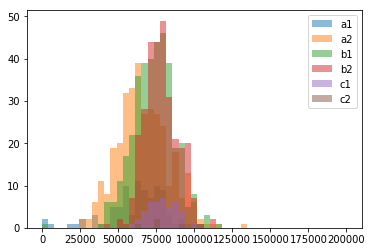

In [16]:
import math
a1 = df.loc[df['Level'] == "A1"]['meanFreq']
a2 = df.loc[df['Level'] == "A2"]['meanFreq']
b1 = df.loc[df['Level'] == "B1"]['meanFreq']
b2 = df.loc[df['Level'] == "B2"]['meanFreq']
c1 = df.loc[df['Level'] == "C1"]['meanFreq']
c2 = df.loc[df['Level'] == "C2"]['meanFreq']

bins = np.linspace(0, 200000, 50)

plt.hist(a1, bins, alpha=0.5, label='a1')
plt.hist(a2, bins, alpha=0.5, label='a2')
plt.hist(b1, bins, alpha=0.5, label='b1')
plt.hist(b2, bins, alpha=0.5, label='b2')
plt.hist(c1, bins, alpha=0.5, label='c1')
plt.hist(c2, bins, alpha=0.5, label='c2')

plt.legend(loc='upper right')
plt.show()

In [15]:
print(np.mean(df.loc[df['Level'] == "A1"]['meanFreq']))
print(np.mean(df.loc[df['Level'] == "A2"]['meanFreq']))
print(np.mean(df.loc[df['Level'] == "B1"]['meanFreq']))
print(np.mean(df.loc[df['Level'] == "B2"]['meanFreq']))
print(np.mean(df.loc[df['Level'] == "C1"]['meanFreq']))
print(np.mean(df.loc[df['Level'] == "C2"]['meanFreq']))

62451.15115791996
66595.05659171546
73226.25400749201
78119.64917705527
78821.43848778894
76751.12382841148
